<a href="https://colab.research.google.com/github/Vasanthi1723/FMML_labs_17/blob/main/Mod3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization
## Module Coordinator: Jashn Arora

---

## Binary Classification Task: Diabetes Dataset

We’ll be using ML techniques learnt uptil now to predict whether a Pima Indian Woman has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc.



# Introduction

Scientists carried out a study to investigate the significance of health-related predictors of diabetes in **Pima Indian Women**. The study population was females (21 years and above) of Pima Indian heritage.

The purpose of the study was to find out the factors that are associated with the presence of diabetes in Pima Indians.

To find out the reason behind this, we have to first analyze the relationship between different features, such as the number of times a woman was pregnant, their BMI, prevalence of diabetes, etc.

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
# Upload the preprocessed diabetes data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving preprocessed_diabetes_data (1)_79fe7804559805daf18ca6bde9a87927 (1).csv to preprocessed_diabetes_data (1)_79fe7804559805daf18ca6bde9a87927 (1).csv


In [5]:
# View top 10 rows of the Diabetes dataset


## Identification of variables and data types

Dataset comprises of 768 observations and 9 fields.

The following features have been provided to help us predict whether a person is diabetic or not:

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test. Less than 140 mg/dL is considered normal level of glucose.
* **BloodPressure:** Diastolic blood pressure (mm Hg). 120/80 is normal BP level for females above 18 years old.
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml). 16-166 mIU/L is considered the normal level of insulin.
* **BMI:** Body mass index (weight in kg/((height in m$)^2$))
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (in years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


In [11]:
# Get the details of each column


Let us see distribution and also boxplot for outliers of feature "Pregnancies".

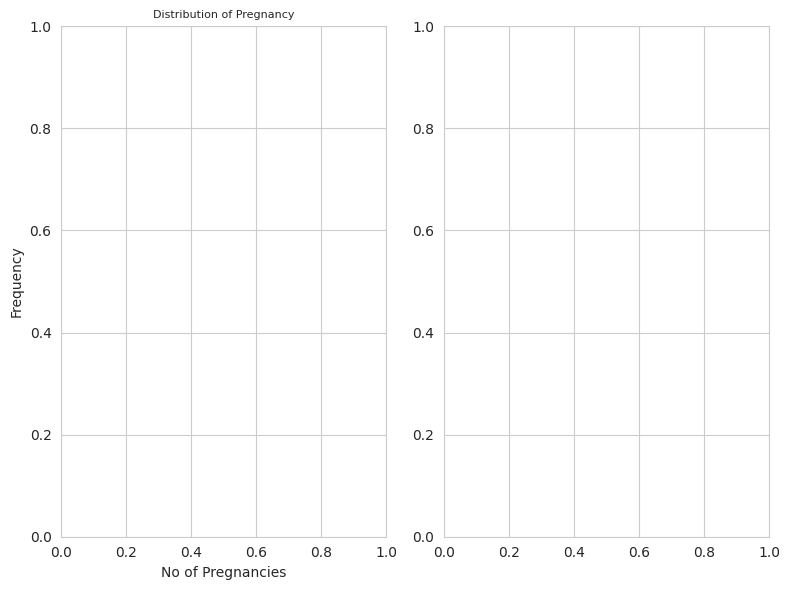

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))


axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plt.tight_layout()

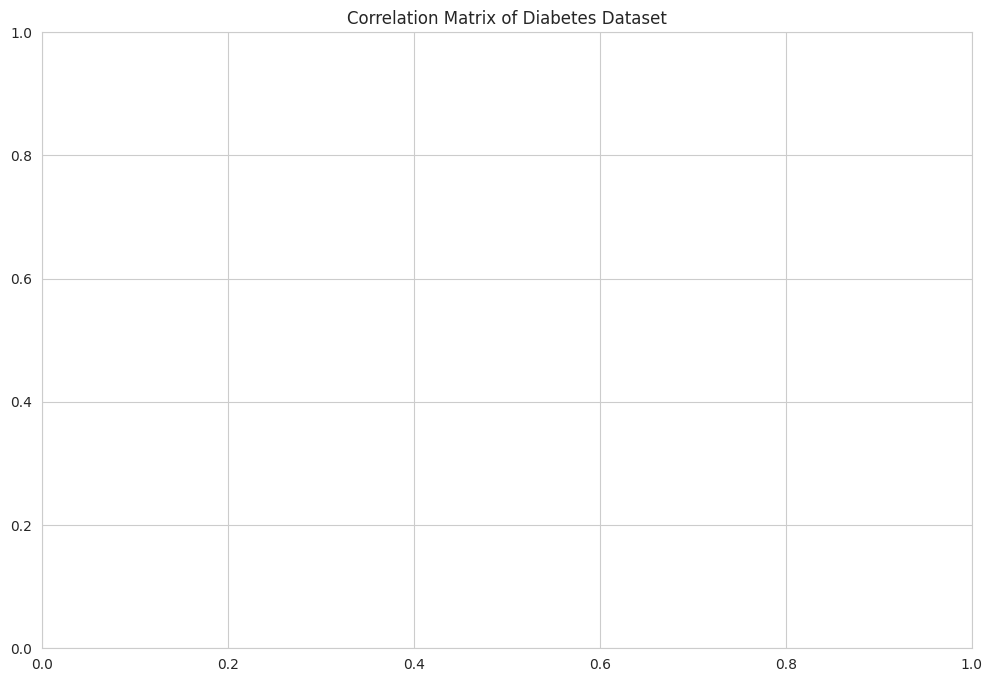

In [21]:
# prompt: ## TASK-1 :
# ## Find out the "Correlation" between the different attributes present in the data.
# ## Also plot a heatmap (refer Seaborn documentation) for the correlation values obtained.

# Assuming your uploaded file is named 'diabetes.csv'

# Calculate the correlation matrix


# Plot the heatmap
plt.figure(figsize=(12, 8))

plt.title('Correlation Matrix of Diabetes Dataset')
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

* From the correlation map you just obtained above, it seems that Insulin is highly correlated with Glucose, BMI and Age. It means that as the values of glucose, BMI and Age increase, the insulin is also increasing. It seems logical also that overweight and elderly people might have a higher level of insulin in their bodies.  

* In the same way SkinThickness is highly correlated with BMI.

## Checking  if the data is balanced or imbalanced

We can produce a seaborn count plot to check if the output is dominated by one of the classes or not.

Text(0.5, 1.0, 'Output class distribution')

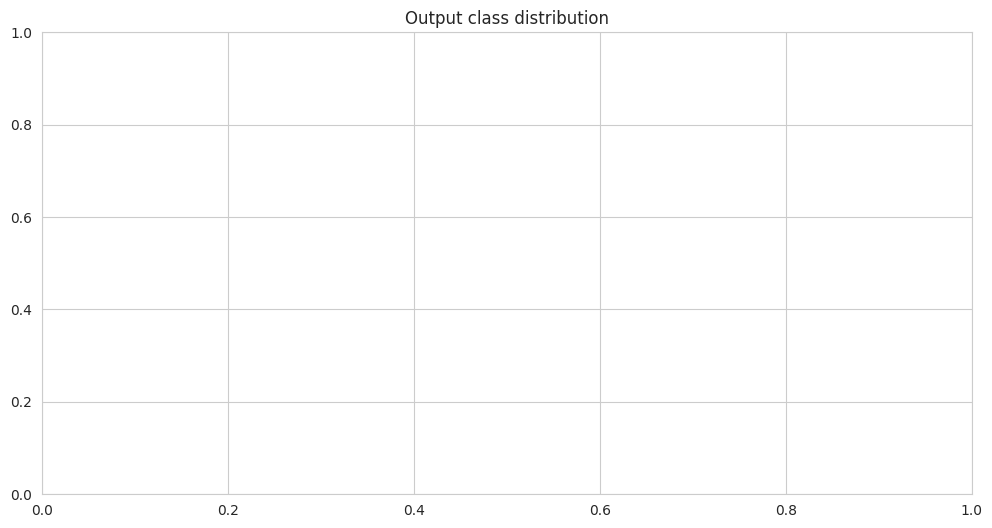

In [25]:
plt.figure(figsize=(12,6))

plt.title("Output class distribution")



<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A total of 768 women were registered in the database. 268 women had diabetes, while 500 women did not have diabetes.

The above graph shows that the dataset is biased towards non-diabetic people. The number of non-diabetic people is almost twice the number of diabetic patients.

## Scatter matrix of data

A pair-plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [27]:
# prompt: ## TASK-2: Display a pairplot using Seaborn for the diabetes dataset, with the 'outcome' as the hue.

# Assuming your DataFrame is named 'df' and it contains the diabetes dataset.

plt.show()

## BMI vs Outcome

In [29]:
plt.figure(figsize=(12,8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

It is surprising that the median BMI does not significanty change as the number of pregnancies increases. Those who tested positive for diabetes had higher BMIs than those who did not. However,there is not a very large difference between the medians.

BMI might be higher for women who have had more numbers of pregnancies as well as for those who test positive for diabetes and that the relationship between the pedigree function and the test results will show that those who had a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

## Pedigree function vs Diabetes

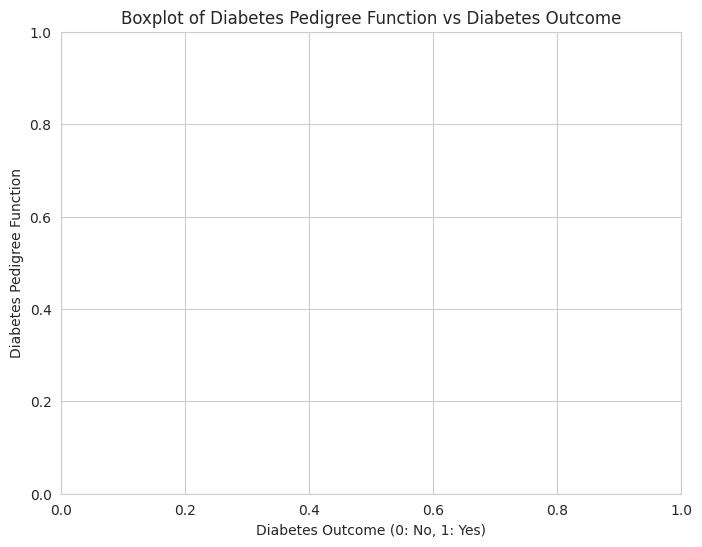

In [31]:
# prompt: ## TASK-3: Display a boxplot between the Pedigree function and Diabetes.

# Assuming your DataFrame is named 'df' and it contains the diabetes dataset.
plt.figure(figsize=(8, 6))

plt.title('Boxplot of Diabetes Pedigree Function vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>
This graph more clearly shows the relationship between the pedigree function and the test results that the women got for diabetes. Since those who tested positive have a higher median and more high outliers, it is clear that the pedigree function does in fact, accurately help estimate the test results for diabetes. It shows that diabetes does follow genetics so those whose ancestors suffered from it have a higher risk of getting the disease themselves as well. Both test results show many outliers yet the outliers for those who tested negative seem to have lower pedigree functions than those who tested positive. This indicates that the genetic component is likely to contribute more to the emergence of diabetes in the Pima Indians and their offspring.

## Pregnancy vs Diabetes

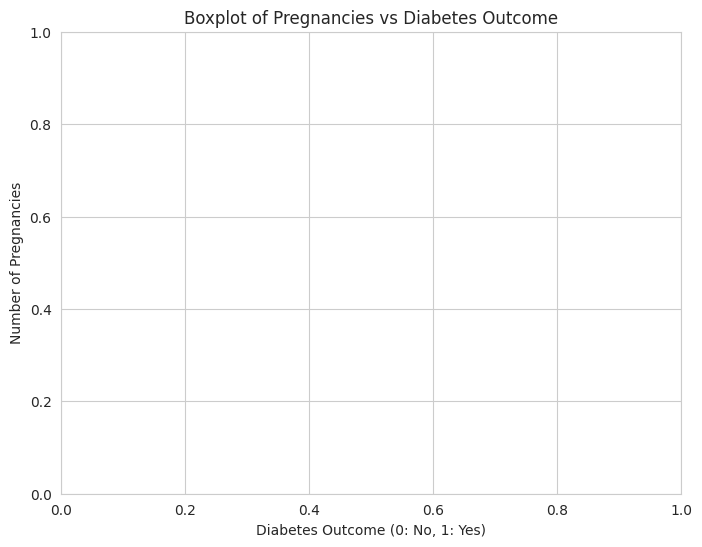

In [34]:
# prompt: ## TASK-4: Display a boxplot between the number of Pregnancies and Diabetes.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your uploaded file is named 'diabetes.csv'


plt.figure(figsize=(8, 6))

plt.title('Boxplot of Pregnancies vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Number of Pregnancies')
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The average number of pregnancies is higher in diabetic as compared to non-diabetic women.

## Prevalence of Diabetes vs BMI

Let's try to find out the prevalence of diabetes and its relation to their BMI. Please note that the range of normal BMI is 18.5 to 25.

In [41]:
plt.figure(figsize=(12,8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>

The Body Mass Index (BMI) shows a significant association with the occurrence of diabetes.  
The interquartile range for the women who tested positive reaches a higher BMI than the IQR for those who tested negative. Therefore, women could have higher BMIs and not be outliers if they tested positive as opposed to negative, showing that more women who tested positive did, in fact, have higher BMIs than those who tested negative.


## Age vs Diabetes

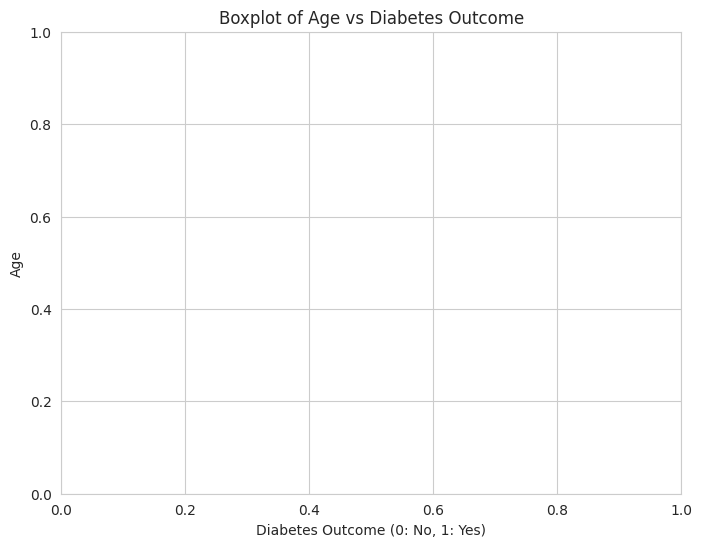

In [44]:
# prompt: ## TASK-5: Display a boxplot between Age and Diabetes.

# Assuming your DataFrame is named 'df' and it contains the diabetes dataset.
plt.figure(figsize=(8, 6))

plt.title('Boxplot of Age vs Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

<p style="font-weight: bold;color:#FF4500"><b>Observations</b></p>  

A significant relation can be seen between the age distribution and occurrence of diabetes. Women at age group > 31 years were at higher risk of getting diabetes in comparison to the younger age group.

# The Importance of Standardizing Data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

*Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.*

## Standardize the Variables
Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ Z = {X - \mu \over \sigma}$$


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Comparing Accuracy before and after Standardization

In [78]:
# prompt: ## TASK-7: Refer to MinMax Scaler provided in scikit-learn.
# ## Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

# Assuming your DataFrame is named 'df' and it contains the diabetes dataset.


# Split the data into training and testing sets


# Perform MinMax scaling on the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler

# Train a KNN model on the scaled data
knn = KNeighborsClassifier(n_neighbors=11)  # You can adjust the k value


# Make predictions on the scaled test data


# Evaluate the model's performance



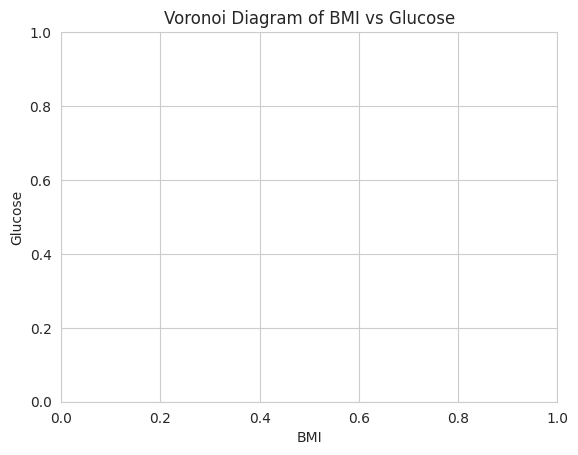

In [84]:
# prompt: ## TASK-8:
# ## Plot the voronoi diagram for the TASK-7

import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Assuming you have a DataFrame 'df' with the diabetes dataset

# Select two features for the Voronoi diagram (e.g., BMI and Glucose)


# Create a list of points for the Voronoi diagram


# Calculate the Voronoi diagram


# Plot the Voronoi diagram
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('Voronoi Diagram of BMI vs Glucose')
plt.show()

In [86]:
# prompt: ## TASK-9: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.

from sklearn.model_selection import cross_val_score, KFold

# Assuming you have already defined your X and y (features and target variable)
# and have the classification models you want to evaluate (e.g., knn, logistic regression, etc.)

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this value

# Create a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Function to perform cross-validation and print results
def evaluate_model_with_cross_validation(model, X, y, model_name):
    """Performs K-Fold cross-validation and prints the results."""

    cv_scores = cross_val_score(model, X, y, cv=kf)
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"{model_name} Mean Accuracy: {np.mean(cv_scores)}")
    print(f"{model_name} Standard Deviation: {np.std(cv_scores)}")
    print("-" * 40)

# Example usage for KNN
# Assuming 'knn' is your trained KNN model, X and y are your features and target variable


# Repeat the above function call for other models you want to evaluate
# For example, if you have a Logistic Regression model named 'logreg':
# evaluate_model_with_cross_validation(logreg, X, y, "Logistic Regression")

# Analysis of the results:

# 1. Compare the mean accuracy across different models.
# 2. Analyze the standard deviation of the accuracy scores. A lower standard deviation
#    indicates more consistent performance across different folds.
# 3. Look for significant differences in performance between different models or
#    between models with and without feature scaling/standardization.
# 4. You can visualize the results using boxplots to compare the distribution of
#    accuracy scores for different models.

# Conclusion

From the data analysis we carried out, it seems that there is some form of an association between BMI, number of pregnancies, pedigree function, and the test results for diabetes.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

# References

https://www.kaggle.com/dktalaicha/diabetes-prediction-by-knn